# Fraktaalsed atraktorid ja Minkowski-Bouligandi dimensioon

Varasemas loengus uurisime, kuidas saab fraktaali dimensiooni defineerida, ja jõudsime sarnasusdimensiooni definitsioonini. See tööleht räägib alternatiivsest mõistest, mida nimetatakse [Minkowski-Bouligandi dimensiooniks](http://en.wikipedia.org/wiki/Minkowski%E2%80%93Bouligand_dimension), ja näitab kuidas definitsiooni saab rakendada atraktoritele. Sarnane mõiste, mis tihti langeb kokku Minkowski-Bouligandi dimensiooniga, on [Hausdorff-Besikovitši dimensioon](http://en.wikipedia.org/wiki/Hausdorff_dimension).

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import numpy.random as rnd

## Minkowski-Bouligandi dimensioon

[Minkowski-Bouligandi dimensioon](http://en.wikipedia.org/wiki/Minkowski%E2%80%93Bouligand_dimension), või *kastilugemise dimensioon*, on veel üks võimalus, kuidas saab fraktaali dimensiooni defineerida. Selleks jagatakse faasiruumi $Q = \mathbb{R}^m$ ühtlaselt kastideks

$$Q^{\epsilon}_{i_1 \cdots i_m} = \left[\epsilon\left(i_1 - \frac{1}{2}\right), \epsilon\left(i_1 + \frac{1}{2}\right)\right) \times \ldots \times \left[\epsilon\left(i_m - \frac{1}{2}\right), \epsilon\left(i_m + \frac{1}{2}\right)\right).$$

Me nüüd uurime hulka $S \subset Q$. Olgu $N(\epsilon)$ nende suurusega $\epsilon$ kastide $Q^{\epsilon}_{i_1 \cdots i_m}$ arv, mille puhul kehtib $S \cap Q^{\epsilon}_{i_1 \cdots i_m} \neq \emptyset$, ehk hulga maht

$$N(\epsilon) = \#\left\{(i_1, \ldots, i_m) \in \mathbb{Z}^m, S \cap Q^{\epsilon}_{i_1 \cdots i_m} \neq \emptyset\right\}.$$

Piiril $\epsilon \to 0$ leiame, et kastide arv käitub kui $N(\epsilon) \approx C\epsilon^{-d}$, kus $C$ on konstantne $d$ on *Minkowski-Bouligandi dimensioon*. Logaritimi abil leiame

$$\ln N(\epsilon) \approx \ln C - d\ln\epsilon.$$

Sellest järeldub

$$d = -\lim_{\epsilon \to 0}\frac{\ln N(\epsilon) - \ln C}{\ln\epsilon} = -\lim_{\epsilon \to 0}\frac{\ln N(\epsilon)}{\ln\epsilon}.$$

Praktikas on tihti kasulikum, Minkowski-Bouligandi dimensioon teisel viisil arvutada. Tavaliselt teame, et hulk $S$ on risttahuka $R$ alamhulk, $S \subset R \subset Q$. Seega piisab sellest, et me jagame hulka $R$ kastideks, niiet kastide koguarv on lõplik. Kastide suuruseks kasutame $\epsilon = 2^{-p}$, millest järeldub $\ln\epsilon = -p\ln 2$. Seega kehtib

$$\ln N(2^{-p}) \approx \ln C + dp\ln 2.$$

Funktsioon

$$p \mapsto \frac{\ln N(2^{-p})}{\ln 2} = \log_2N(2^{-p})$$

seega käitub asümptootiliselt nagu lineaarne funktsioon, mille kasv on $d$, ja me võime defineerida

$$d = \lim_{p \to \infty}\frac{d}{dp}\log_2N(2^{-p}).$$

Piiril $p \to \infty$ ilmub aga praktiline probleem, et tihti teame ainult lõpliku arvu punkte $x_n \in S$, näiteks kui $S$ on diskreetse dünaamika atraktor, ja $(x_n)$ on trajektoor, mis koondub atraktorile, ja millest meil on lõplik osa $x_0, \ldots, x_{n_0 - 1}$ arvutatud. Kui me aga eeldame, et $S \approx S_{n_0} = \{x_n, n < n_0\}$, siis kehtib

$$N_{n_0}(\epsilon) = \#\left\{(i_1, \ldots, i_m) \in \mathbb{Z}^m, S \cap Q^{\epsilon}_{i_1 \cdots i_m} \neq \emptyset\right\} = \#\left\{(i_1, \ldots, i_m) \in \mathbb{Z}^m, \exists n < n_0: x_n \in Q^{\epsilon}_{i_1 \cdots i_m} \neq \emptyset\right\} \leq n_0,$$

kuna kastide arv, milles asub vähemalt üks punkt $x_n$, ei saa olla suurem kui punktide arv $n_0$. Seega $N_{n_0}(\epsilon)$ ei saa kasvata üle selle piiri. Praktiliselt peame seega sellega leppima, et on mõistlik ülempiir $p$, mis on seda suurem, mida suurem on punktide arv $n_0$.

Alljärgnev algoritm aitab hinnata Minkowski-Bouligandi dimensiooni, kui hulk asub kahemõõtmelises faasiruumis. `pts` on punktide loetelu, `xmin` ja `xmax` on ristküliku alumine-vasakpoolne ja ülemine-parempoolne nurk ning `pmax` on parameetri $p$ maksimaalne väärtus. Algoritm joonistab $\frac{d}{dp}\log_2N(2^{-p})$ sõltuvalt parameetrist $p$. Kui joon on horitsontaalne, võrdub $\frac{d}{dp}\log_2N(2^{-p})$ umbes Minkowski-Bouligandi dimensiooniga.

In [2]:
def hbdim(pts, xmin, xmax, pmax):
    sets = [np.zeros((2 ** p, 2 ** p), dtype=np.int8) for p in range(pmax + 1)]

    Xmin = np.array(xmin)
    Xdiff = np.array(xmax) - Xmin
    
    for x in pts:
        y = (x - Xmin) / Xdiff
        for p in range(pmax + 1):
            sets[p][int(2 ** p * y[0]), int(2 ** p * y[1])] = 1

    visited = [s.sum() for s in sets]
    logs = np.log2(visited)
    ldiff = np.diff(logs)

    print(visited)
    print(logs)
    print(ldiff)
    
    plt.plot(logs)
    plt.show()
    
    plt.plot(ldiff)
    plt.show()

## Henon atraktor

Esimene fraktaal, millele me Minkowski-Bouligandi algoritmi rakendame, on [Henoni atraktor](http://en.wikipedia.org/wiki/H%C3%A9non_map). See on diskreetse dünaamika atraktor faasiruumis $Q = \mathbb{R}^2$, mis on definieeritud kui

\begin{align}
x_{n + 1} &= y_n - ax_n^2 + 1,\\
y_{n + 1} &= bx_n.
\end{align}

Seega defineerime:

In [3]:
def henon(x, a, b):
    return [x[1] + 1 - a * x[0] ** 2, b * x[0]]

Konstantsed parameetrid on tavaliselt valitud $a = 1.4$ ja $b = 0.3$:

In [4]:
a = 1.4
b = 0.3

Atraktori joonistamiseks on lisaks ka algtingimust vaja. Algtingimuseks valime $(x_0, y_0) = (0, 0)$.

In [5]:
x = [0, 0]

Atraktori jooonistamiseks arvutame trajektoori. Trajektoori algust $(x_0, y_0), \ldots, (x_{n_1}, y_{n_1})$ me ei joonista, kuna siis trajektoor alles läheneb atraktorile, vaid joonistame ainult osa $(x_{n_1 + 1}, y_{n_1 + 1}), \ldots, (x_{n_2}, y_{n_2})$. Selleks valime $n_1$ ja $n_2$ järgnevalt:

In [6]:
npre = 100
nmax = 1000000

Lõpuks joonistame:

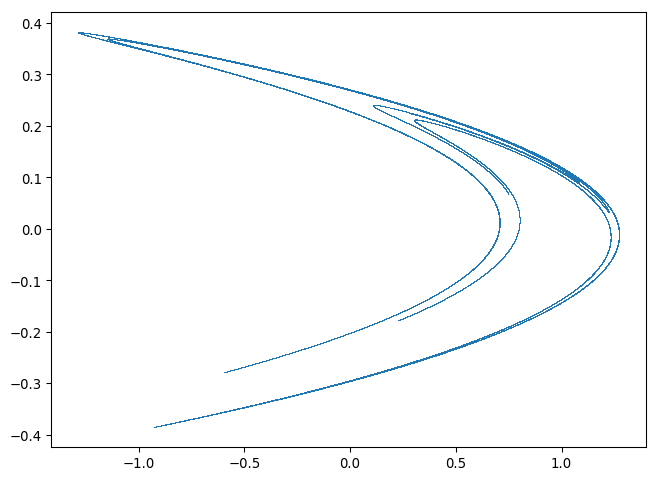

In [7]:
res = []

for _ in range(npre):
    x = henon(x, a, b)

for _ in range(nmax):
    x = henon(x, a, b)
    res.append(x)

val = np.array(res)

fig = plt.figure(figsize=(8, 6), dpi=96)
ax = fig.add_subplot(111)
ax.scatter(val[:, 0], val[:, 1], marker=".", s=1, lw=0)
plt.show()

Lisaks arvutame ka Minkowski-Bouligandi dimensiooni eelnevalt defineeritud algoritmi abil. Kõik punktid trajektoori peal asuvad hulgas $(-1.5, 1.5) \times (-0.5, 0.5) \subset \mathbb{R}^2$. Seega valime:

[1, 4, 12, 26, 61, 144, 352, 810, 1920, 4432, 10506, 25371, 58905, 137418, 280477, 487080, 685779]
[  0.           2.           3.5849625    4.70043972   5.93073734
   7.169925     8.45943162   9.6617781   10.9068906   12.11374217
  13.35892587  14.63089276  15.84610248  17.06821147  18.09752294
  18.89379922  19.3873842 ]
[ 2.          1.5849625   1.11547722  1.23029762  1.23918766  1.28950662
  1.20234648  1.2451125   1.20685157  1.2451837   1.27196689  1.21520971
  1.22210899  1.02931148  0.79627628  0.49358498]


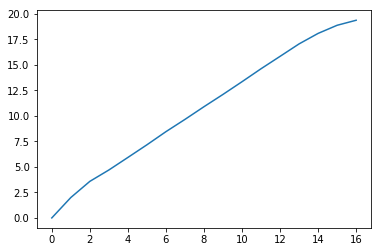

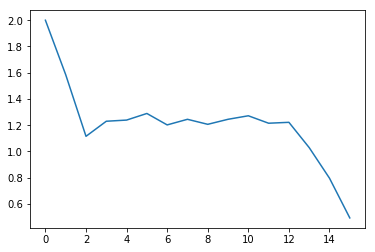

In [8]:
hbdim(val, [-1.5, -0.5], [1.5, 0.5], 16)

Joonis näitab, et logaritmide kasv on enam-vähem tasane vahemikus $1.2 \ldots 1.3$. Sellest järeldub, et Minkowski-Bouligandi dimensioon asub selles vahemikus. [Kirjanduses](http://journals.aps.org/pra/abstract/10.1103/PhysRevA.38.1503) leidub väärtus $1.261 \pm 0.003$.

## Itereeritud funktsioonisüsteemid

Järgmisena uurime fraktaalide klassi, mis ei ole determineeritud dünaamika, vaid juhusliku dünaamika atraktorid. Faasiruumis $Q$ on antud $m$ funktsiooni $f_1, \ldots, f_m: Q \to Q$. Igal sammul $x_n \to x_{n + 1}$ valitakse juhuslikult ühe. Seega tekib juhuslik trajektoor. Sellist süsteemi nimetatakse [itereeritud funktsioonisüsteemiks](http://en.wikipedia.org/wiki/Iterated_function_system).

Alljärgnev kood joonistab sellist süsteemi.

In [3]:
def ifsplot(ifs, x0, npre, nmax):
    ni = len(ifs)
    wgh = []
    for fkt in ifs:
        wgh.append(fkt[2])
    wgh = np.array(wgh) / sum(wgh)

    rnd.seed()
    x = x0
    res = []

    for _ in range(npre):
        r = rnd.choice(ni, p=wgh)
        x = np.dot(ifs[r][0], x) + ifs[r][1]

    for _ in range(nmax):
        r = rnd.choice(ni, p=wgh)
        x = np.dot(ifs[r][0], x) + ifs[r][1]
        res.append(x)

    val = np.array(res)

    fig = plt.figure(figsize=(6, 6), dpi=96)
    ax = fig.add_subplot(111)
    ax.set_aspect('equal')
    ax.scatter(val[:, 0], val[:, 1], marker=".", s=1, lw=0)
    plt.show()
    
    return val

Nagu ka eelmise näite puhul valime joonistamiseks ainult trajektoori osa, mis asub atraktori lähedal.

In [4]:
npre = 100
nmax = 1000000

Lisaks valime ka algtingimust. Kuna trajektoor jälgib atraktori kuju, ei sõltu trajektoori kvalitatiivne kuju algtingimuse valikust.

In [5]:
x0 = np.array([0.3, 0.7])

Süsteemides, mida me uurime, on funktsioonid $f_i$ affiinsed teisendused kahemõõtmelises ruumis,

$$f_i(\underline{x}) = \underline{\underline{M}} \cdot \underline{x} + \underline{v}.$$

### Sierpinski kolmnurk

Esimene näide on Sierpinski kolmnurk, mida me juba varasemas loengus joonistasime. Nüüd konstrueerime seda intereeritud funktsioonisüsteemina. Selleks valime:

In [16]:
sierp3 = [
    (np.array([[1/2, 0], [0, 1/2]]), np.array([0, 1]), 1),
    (np.array([[1/2, 0], [0, 1/2]]), np.array([np.sqrt(3)/2, -1/2]), 1),
    (np.array([[1/2, 0], [0, 1/2]]), np.array([-np.sqrt(3)/2, -1/2]), 1)
]

Tulemus on tuttav kuju:

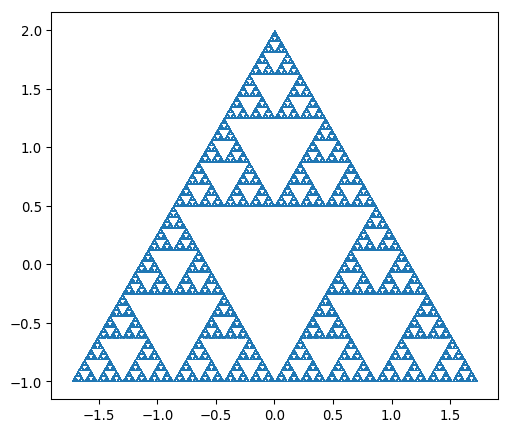

In [17]:
val = ifsplot(sierp3, x0, npre, nmax)

Lisaks arvutame ka Minkowski-Bouligandi dimensiooni:

[1, 4, 12, 40, 116, 342, 1046, 3163, 9488, 28037, 81476, 227182, 508665, 775601, 915304, 970674, 990007]
[  0.           2.           3.5849625    5.32192809   6.857981
   8.41785251  10.03066714  11.62707784  13.21188829  14.77504437
  16.31408753  17.79348901  18.9563563   19.56495514  19.80389146
  19.88862732  19.9170792 ]
[ 2.          1.5849625   1.73696559  1.5360529   1.55987152  1.61281462
  1.5964107   1.58481045  1.56315607  1.53904317  1.47940147  1.1628673
  0.60859883  0.23893632  0.08473586  0.02845188]


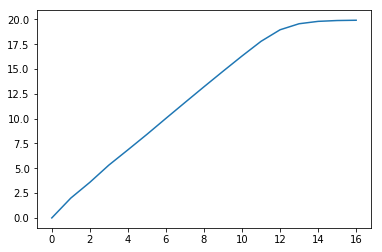

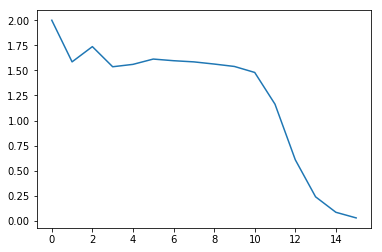

In [18]:
hbdim(val, [-2.0, -1.0], [2.0, 2.1], 16)

Joonis näitab, et Minkowski-Bouligandi dimensioon on umbes $1.55 \ldots 1.6$. Tuletame meelde, et sarnasusdimensioon on $\frac{\ln 3}{\ln 2}$:

In [19]:
np.log(3) / np.log(2)

1.5849625007211563

### Sierpinski vaip / nelinurk

Samuti tuttav näide on Sierpinski vaip, mida me konstrueerime järgnevalt:

In [20]:
sierp4 = [
    (np.array([[1/3, 0], [0, 1/3]]), np.array([1, 1]), 1),
    (np.array([[1/3, 0], [0, 1/3]]), np.array([1, -1]), 1),
    (np.array([[1/3, 0], [0, 1/3]]), np.array([-1, 1]), 1),
    (np.array([[1/3, 0], [0, 1/3]]), np.array([-1, -1]), 1),
    (np.array([[1/3, 0], [0, 1/3]]), np.array([1, 0]), 1),
    (np.array([[1/3, 0], [0, 1/3]]), np.array([0, 1]), 1),
    (np.array([[1/3, 0], [0, 1/3]]), np.array([-1, 0]), 1),
    (np.array([[1/3, 0], [0, 1/3]]), np.array([0, -1]), 1)
]

Ka selle süsteemi kuju on juba tuttav:

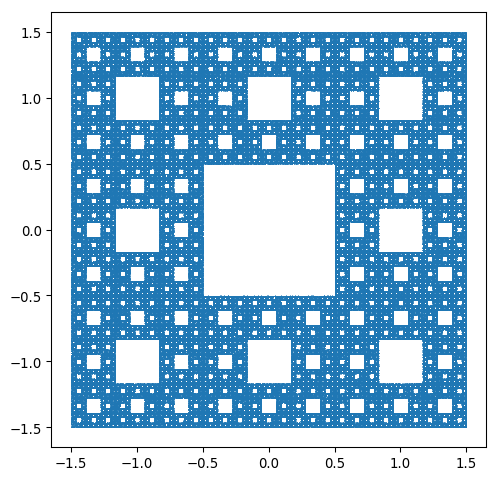

In [21]:
val = ifsplot(sierp4, x0, npre, nmax)

Järgmisena arvutame Minkowski-Bouligandi dimensiooni:

[1, 4, 16, 60, 240, 768, 2816, 10912, 39608, 145489, 442621, 776234, 931345, 980865, 994840, 998607, 999637]
[  0.           2.           4.           5.9068906    7.9068906
   9.5849625   11.45943162  13.41362793  15.27350423  17.15055055
  18.75571238  19.5661321   19.82895616  19.90369506  19.92410499
  19.92955749  19.93104478]
[  2.00000000e+00   2.00000000e+00   1.90689060e+00   2.00000000e+00
   1.67807191e+00   1.87446912e+00   1.95419631e+00   1.85987630e+00
   1.87704632e+00   1.60516182e+00   8.10419725e-01   2.62824061e-01
   7.47388996e-02   2.04099291e-02   5.45250382e-03   1.48728186e-03]


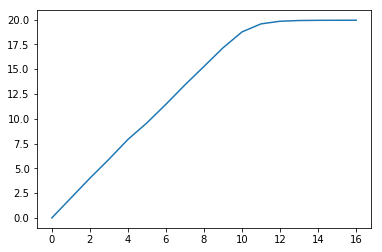

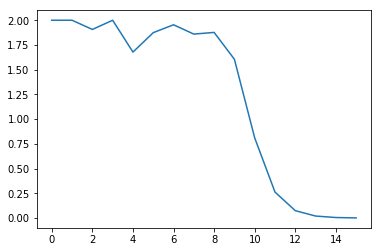

In [22]:
hbdim(val, [-1.6, -1.6], [1.6, 1.6], 16)

Tulemus näitab, et ta on umbes $1.85 \ldots 1.9$. Sarnasusdimensioon on $\frac{\ln 8}{\ln 3}$:

In [23]:
np.log(8) / np.log(3)

1.8927892607143719

### Sierpinski kuusnurk - variant 1

Lisaks eelnevalt näidatud kujudele võib näiteks ka kuusnurka konstrueerida. Üks võimalus on selline:

In [24]:
sierp6a = [
    (np.array([[1/3, 0], [0, 1/3]]), np.array([1, 0]), 1),
    (np.array([[1/3, 0], [0, 1/3]]), np.array([-1, 0]), 1),
    (np.array([[1/3, 0], [0, 1/3]]), np.array([0.5, np.sqrt(3)/2]), 1),
    (np.array([[1/3, 0], [0, 1/3]]), np.array([0.5, -np.sqrt(3)/2]), 1),
    (np.array([[1/3, 0], [0, 1/3]]), np.array([-0.5, np.sqrt(3)/2]), 1),
    (np.array([[1/3, 0], [0, 1/3]]), np.array([-0.5, -np.sqrt(3)/2]), 1)
]

Joonisel on tõepoolest kuusnurga sümmeetria:

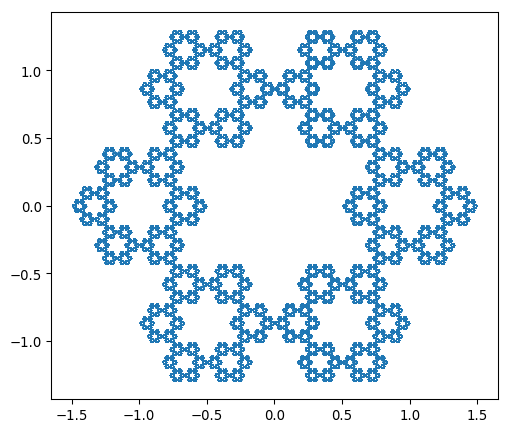

In [25]:
val = ifsplot(sierp6a, x0, npre, nmax)

Arvutame Minkowski-Bouligandi dimensiooni:

[1, 4, 16, 52, 144, 476, 1408, 4411, 13666, 41470, 120486, 324629, 630194, 849793, 948783, 982950, 994411]
[  0.           2.           4.           5.70043972   7.169925
   8.89481776  10.45943162  12.10689005  13.73830341  15.33978043
  16.878506    18.30843236  19.26543649  19.69675193  19.85571863
  19.90675851  19.92348273]
[ 2.          2.          1.70043972  1.46948528  1.72489276  1.56461386
  1.64745843  1.63141337  1.60147702  1.53872557  1.42992636  0.95700413
  0.43131544  0.1589667   0.05103987  0.01672422]


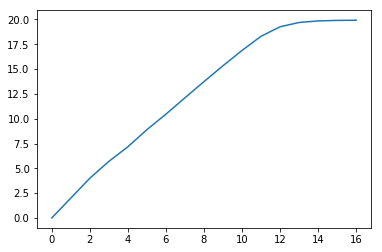

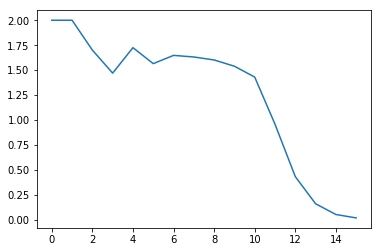

In [26]:
hbdim(val, [-1.6, -1.5], [1.6, 1.5], 16)

Väärtus on seega umbes $1.6 \ldots 1.65$. Analüütiliselt leiame sarnasusdimensiooni $\frac{\ln 6}{\ln 3}$.

In [27]:
np.log(6) / np.log(3)

1.6309297535714573

### Sierpinski kuusnurk - variant 2

Teine võimalus kuidas kuusnurka konstrueerida on selline:

In [28]:
sierp6b = [
    (np.array([[0, np.sqrt(3/25)], [-np.sqrt(3/25), 0]]), np.array([1, 0]), 1),
    (np.array([[0, np.sqrt(3/25)], [-np.sqrt(3/25), 0]]), np.array([-1, 0]), 1),
    (np.array([[0, np.sqrt(3/25)], [-np.sqrt(3/25), 0]]), np.array([0.5, np.sqrt(3)/2]), 1),
    (np.array([[0, np.sqrt(3/25)], [-np.sqrt(3/25), 0]]), np.array([0.5, -np.sqrt(3)/2]), 1),
    (np.array([[0, np.sqrt(3/25)], [-np.sqrt(3/25), 0]]), np.array([-0.5, np.sqrt(3)/2]), 1),
    (np.array([[0, np.sqrt(3/25)], [-np.sqrt(3/25), 0]]), np.array([-0.5, -np.sqrt(3)/2]), 1)
]

Ka seekord leiame kuusnurga sümmeetriat:

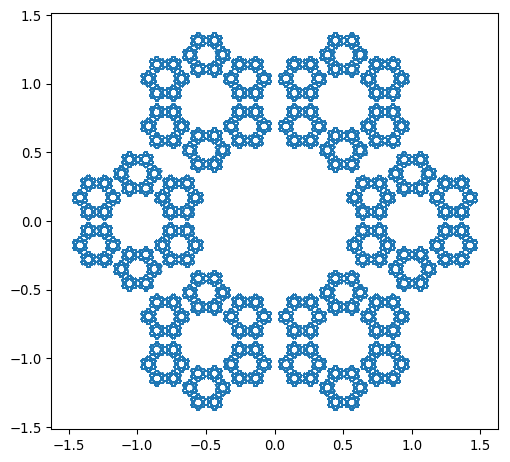

In [29]:
val = ifsplot(sierp6b, x0, npre, nmax)

Arvutame Minkowski-Bouligandi dimensiooni:

[1, 4, 16, 48, 160, 524, 1688, 5278, 17002, 53138, 163039, 423802, 732914, 903029, 968231, 990180, 996933]
[  0.           2.           4.           5.5849625    7.32192809
   9.033423    10.72109919  12.36577564  14.05341684  15.69745631
  17.31485758  18.69303087  19.4832844   19.78441279  19.88499176
  19.91733128  19.92713702]
[ 2.          2.          1.5849625   1.73696559  1.71149491  1.68767619
  1.64467645  1.68764121  1.64403946  1.61740127  1.37817329  0.79025353
  0.3011284   0.10057897  0.03233952  0.00980574]


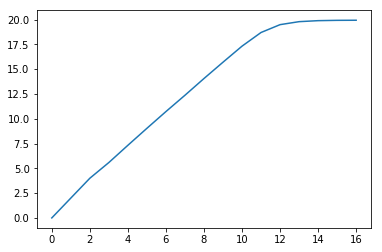

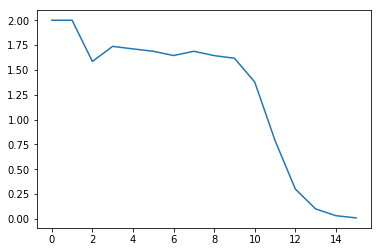

In [30]:
hbdim(val, [-1.6, -1.5], [1.6, 1.5], 16)

Tulemus on umbes $1.65 \ldots 1.7$ ja seega natuke suurem kui eelmisel korral. Analüütiliselt leiame sarnasusdimensiooni $\frac{\ln 6}{\ln\frac{5}{\sqrt{3}}} = \frac{2\ln 6}{2\ln 5 - \ln 3}$.

In [31]:
2 * np.log(6) / (2 * np.log(5) - np.log(3))

1.6901290227715968

### Sõnajalg

Teistsugune näide väiksema sümmeetriaga on sõnajalg, mida me defineerime järgnevalt:

In [32]:
fern = [
    (np.array([[0, 0], [0, 0.16]]), np.array([0, 0]), 1),
    (np.array([[0.85, 0.04], [-0.04, 0.85]]), np.array([0, 1.6]), 85),
    (np.array([[0.2, -0.26], [0.23, 0.22]]), np.array([0, 1.6]), 7),
    (np.array([[-0.15, 0.28], [0.26, 0.24]]), np.array([0, 0.44]), 7)
]

Tulemus selgitab selle kuju nime:

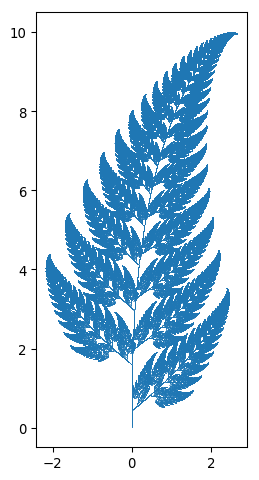

In [33]:
val = ifsplot(fern, x0, npre, nmax)

Arvutame Minkowski-Bouligandi dimensiooni:

[1, 4, 13, 39, 130, 455, 1589, 5713, 20262, 69499, 196728, 401343, 613998, 773528, 871478, 927403, 959907]
[  0.           2.           3.70043972   5.28540222   7.02236781
   8.82972274  10.63390341  12.48003281  14.30648896  16.0847046
  17.58584278  18.61447621  19.22787443  19.56109399  19.73310472
  19.82283687  19.87253511]
[ 2.          1.70043972  1.5849625   1.73696559  1.80735492  1.80418067
  1.84612941  1.82645615  1.77821563  1.50113818  1.02863343  0.61339822
  0.33321956  0.17201073  0.08973215  0.04969824]


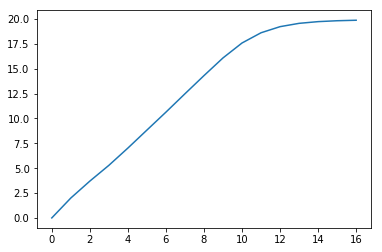

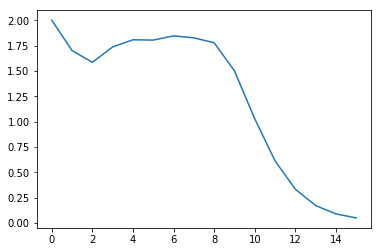

In [34]:
hbdim(val, [-3.0, -0.1], [3.0, 11.0], 16)

### Binaarne puu

Veel üks lihtne võimalus on binaarne puu, mida me järgmisena uurime.

In [35]:
tree = [
    (np.array([[0, 0], [0, 0.5]]), np.array([0, 0]), 1),
    (np.array([[0.42, -0.42], [0.42, 0.42]]), np.array([0, 0.2]), 8),
    (np.array([[0.42, 0.42], [-0.42, 0.42]]), np.array([0, 0.2]), 8),
    (np.array([[0.1, 0], [0, 0.1]]), np.array([0, 0.2]), 3)
]

Tulemus on selline:

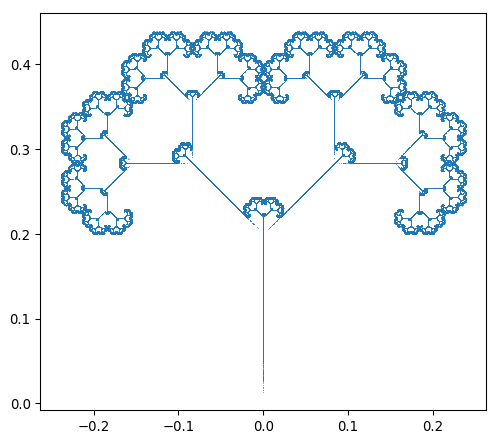

In [36]:
val = ifsplot(tree, x0, npre, nmax)

Arvutame Minkowski-Bouligandi dimensiooni:

[1, 4, 13, 37, 109, 300, 805, 2182, 5826, 15316, 38336, 86927, 167315, 282245, 415564, 555972, 682784]
[  0.           2.           3.70043972   5.20945337   6.76818432
   8.22881869   9.65284497  11.09143539  12.50828999  13.90275194
  15.22641219  16.40751674  17.35220727  18.1065885   18.66471115
  19.0846527   19.38106973]
[ 2.          1.70043972  1.50901365  1.55873096  1.46063437  1.42402628
  1.43859041  1.4168546   1.39446196  1.32366025  1.18110454  0.94469053
  0.75438123  0.55812266  0.41994155  0.29641702]


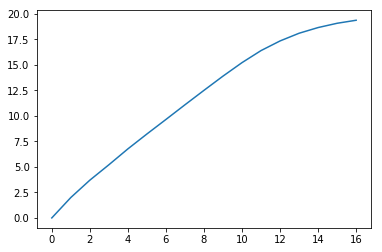

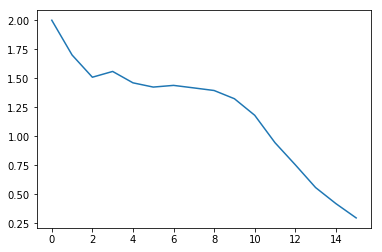

In [37]:
hbdim(val, [-0.25, 0], [0.25, 0.45], 16)

### Test

In [6]:
def sierpn(s, n):
    return [(np.array([[s, 0], [0, s]]), np.array([np.cos(2 * i * np.pi / n), np.sin(2 * i * np.pi / n)]), 1) for i in range(n)]

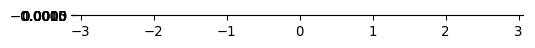

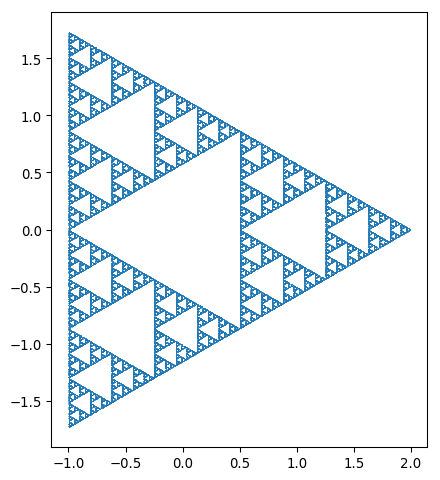

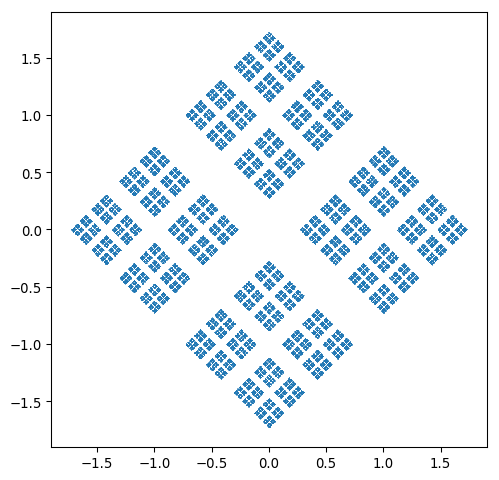

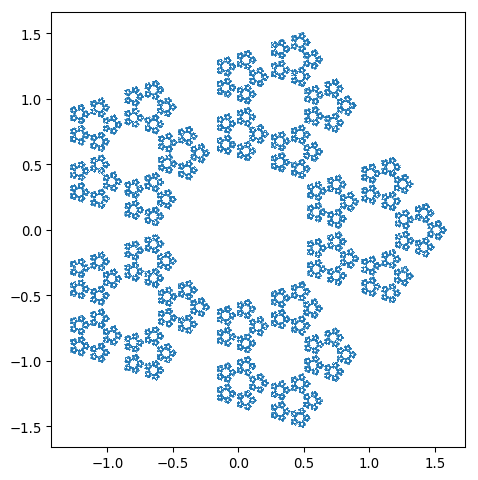

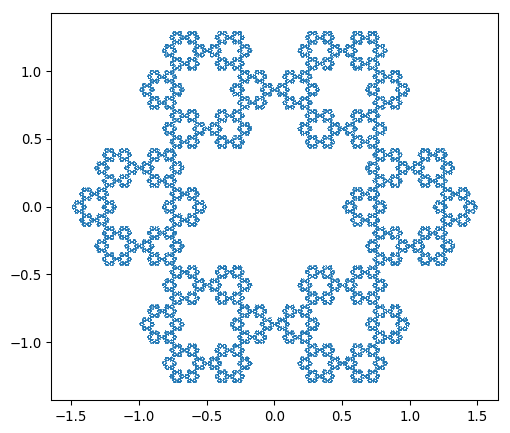

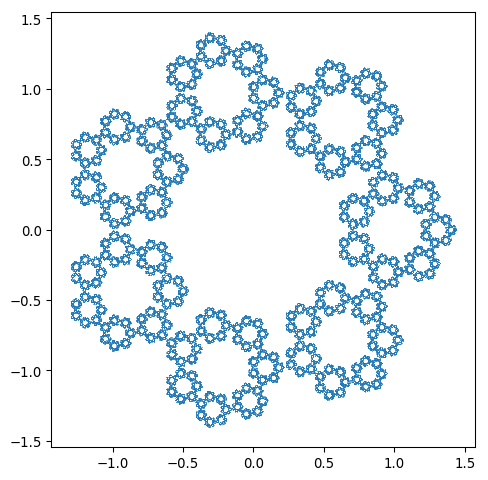

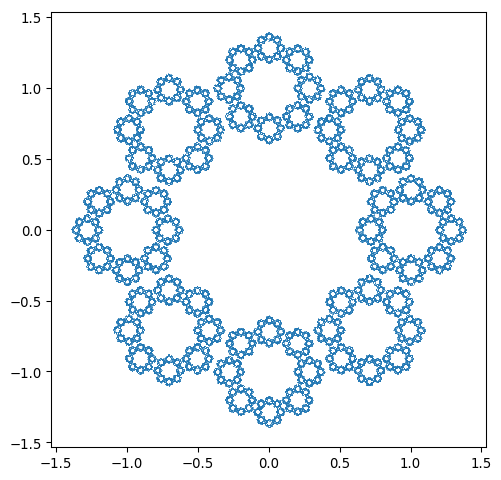

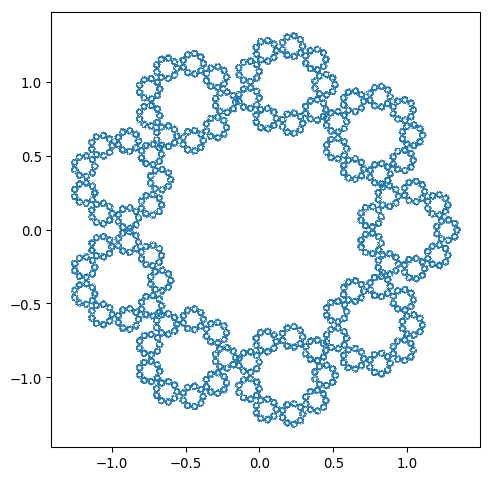

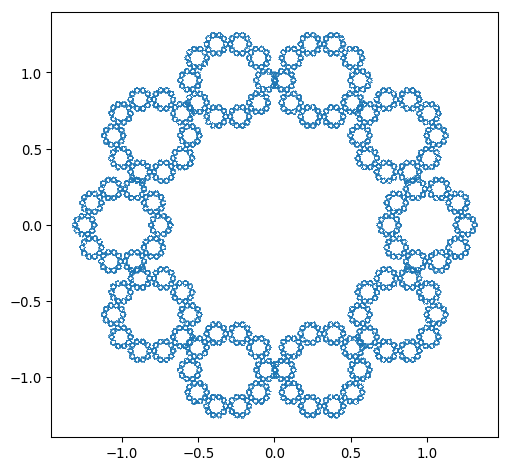

In [9]:
nmax = 100000
vals = [ifsplot(sierpn(1 / (np.sqrt(0.25 + 2 * n) - 0.5), n), x0, npre, nmax) for n in range(2,11)]